In [1]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Getting Apple Stock data from Quandl
AAPL = quandl.get("EOD/AAPL", authtoken="yA7DrKNQ6ErDVWwWyhfc")

In [3]:
AAPL

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,493.10,500.600,487.350,488.580,11854600.0,0.0,1.0,62.701983,63.655673,61.970820,62.127225,82982200.0
2013-09-04,499.56,502.240,496.280,498.691,12322600.0,0.0,1.0,63.523428,63.864214,63.106348,63.412927,86258200.0
2013-09-05,500.25,500.680,493.640,495.270,8441700.0,0.0,1.0,63.611168,63.665846,62.770649,62.977917,59091900.0
2013-09-06,498.44,499.380,489.950,498.220,12840200.0,0.0,1.0,63.381011,63.500540,62.301433,63.353036,89881400.0
2013-09-09,505.00,507.920,503.480,506.170,12167400.0,0.0,1.0,64.215172,64.586476,64.021891,64.363948,85171800.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,174.17,176.020,174.100,175.010,20949896.0,0.0,1.0,168.197501,169.984062,168.129901,169.008696,20949896.0
2017-12-22,174.68,175.424,174.500,175.010,16349444.0,0.0,1.0,168.690012,169.408500,168.516185,169.008696,16349444.0
2017-12-26,170.80,171.470,169.679,170.570,33185536.0,0.0,1.0,164.943062,165.590087,163.860503,164.720949,33185536.0


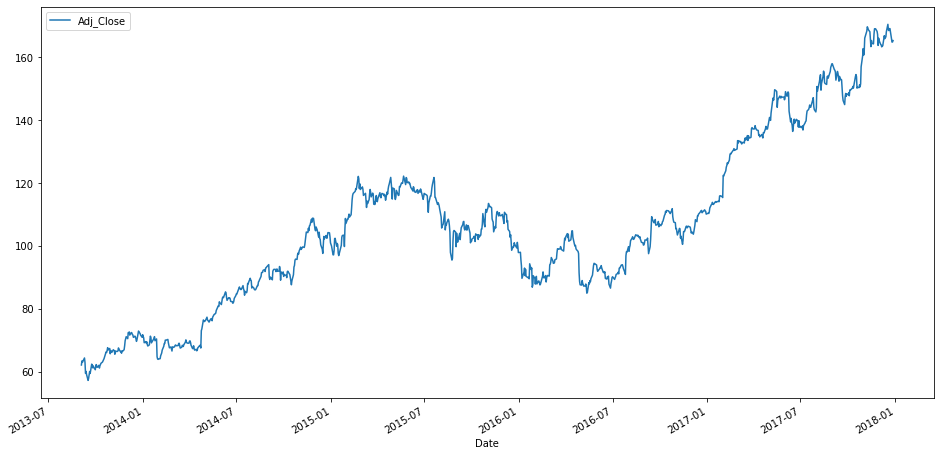

In [4]:
AAPL['Adj_Close'].plot(figsize= (16,8))
plt.legend()

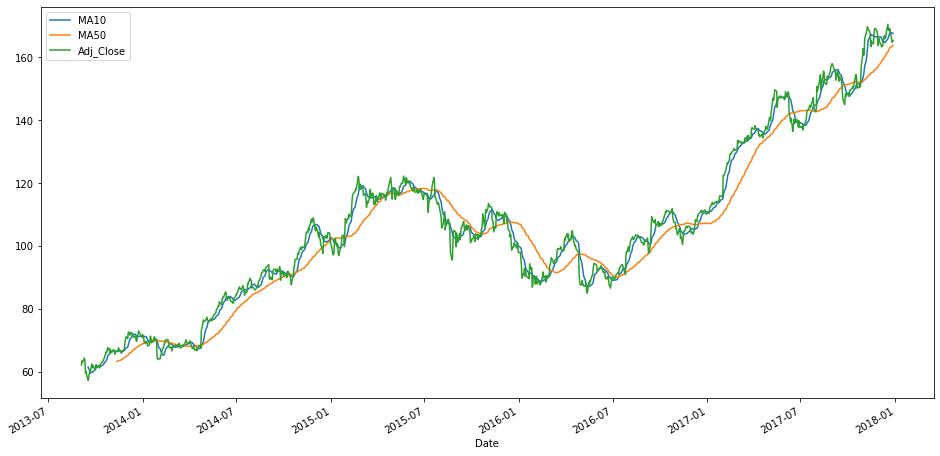

In [5]:
## Adding Simple moving averages with rolling period 10 and 50 days respectively
AAPL["MA10"] = AAPL['Adj_Close'].rolling(10).mean()
AAPL["MA50"] = AAPL['Adj_Close'].rolling(50).mean()
AAPL["MA10"].plot(figsize=(16,8))
AAPL["MA50"].plot()
AAPL['Adj_Close'].plot()
plt.legend()

In [6]:
AAPL = AAPL.dropna()
AAPL.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,MA10,MA50
Date,,,,,,,,,,,,,,
2013-11-11,519.99,521.67,514.41,519.048,8123300.0,0.0,1.0,66.508424,66.723301,65.794723,66.387939,56863100.0,66.398012,63.249272
2013-11-12,517.67,523.92,517.00,520.010,7295600.0,0.0,1.0,66.211688,67.011083,66.125993,66.510982,51069200.0,66.479097,63.336947
2013-11-13,518.00,522.25,516.96,520.634,7043600.0,0.0,1.0,66.253896,66.797485,66.120877,66.590793,49305200.0,66.463664,63.400504
2013-11-14,522.81,529.28,521.87,528.160,10086400.0,0.0,1.0,66.869111,67.696645,66.748882,67.553393,70604800.0,66.572390,63.492014
2013-11-15,526.58,529.09,524.49,524.991,11354300.0,0.0,1.0,67.351306,67.672343,67.083988,67.148068,79480100.0,66.674560,63.567914


In [7]:
## buy when MA10>MA50
## sell when MA50>MA10
AAPL['buy'] = [1 if AAPL.loc[ei, 'MA10'] > AAPL.loc[ei, 'MA50'] else 0 for ei in AAPL.index]
AAPL['sell'] = [1 if AAPL.loc[ei, 'MA50'] > AAPL.loc[ei, 'MA10'] else 0 for ei in AAPL.index]

<ipython-input-7-aa8329aebf97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['buy'] = [1 if AAPL.loc[ei, 'MA10'] > AAPL.loc[ei, 'MA50'] else 0 for ei in AAPL.index]
<ipython-input-7-aa8329aebf97>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['sell'] = [1 if AAPL.loc[ei, 'MA50'] > AAPL.loc[ei, 'MA10'] else 0 for ei in AAPL.index]


In [8]:
AAPL.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,MA10,MA50,buy,sell
Date,,,,,,,,,,,,,,,,
2013-11-11,519.99,521.67,514.41,519.048,8123300.0,0.0,1.0,66.508424,66.723301,65.794723,66.387939,56863100.0,66.398012,63.249272,1,0
2013-11-12,517.67,523.92,517.00,520.010,7295600.0,0.0,1.0,66.211688,67.011083,66.125993,66.510982,51069200.0,66.479097,63.336947,1,0
2013-11-13,518.00,522.25,516.96,520.634,7043600.0,0.0,1.0,66.253896,66.797485,66.120877,66.590793,49305200.0,66.463664,63.400504,1,0
2013-11-14,522.81,529.28,521.87,528.160,10086400.0,0.0,1.0,66.869111,67.696645,66.748882,67.553393,70604800.0,66.572390,63.492014,1,0
2013-11-15,526.58,529.09,524.49,524.991,11354300.0,0.0,1.0,67.351306,67.672343,67.083988,67.148068,79480100.0,66.674560,63.567914,1,0


<ipython-input-9-9717f153cccb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['Adj_Close1'] = AAPL['Adj_Close'].shift(-1)
<ipython-input-9-9717f153cccb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['profit_by_buying'] = [AAPL.loc[ei, 'Adj_Close1'] - AAPL.loc[ei, 'Adj_Close'] if AAPL.loc[ei, 'buy']==1 else 0 for ei in AAPL.index]
<ipython-input-9-9717f153cccb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

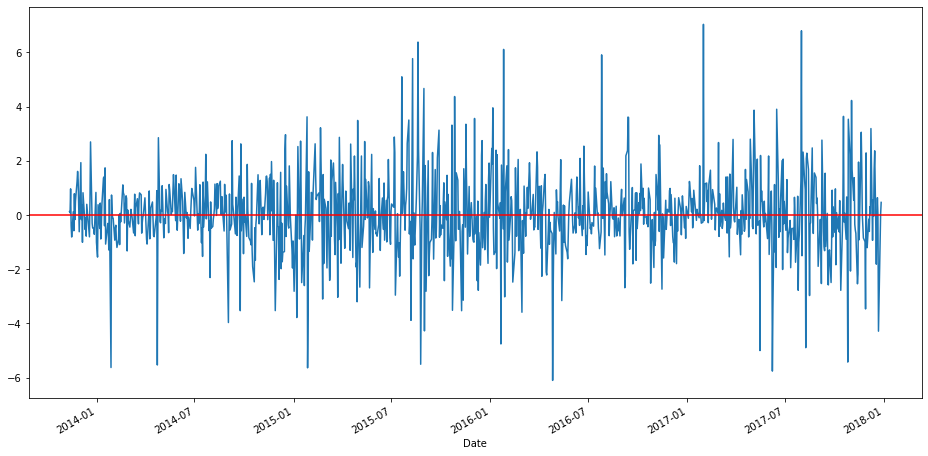

In [9]:
## Calculating profits
AAPL['Adj_Close1'] = AAPL['Adj_Close'].shift(-1)
AAPL['profit_by_buying'] = [AAPL.loc[ei, 'Adj_Close1'] - AAPL.loc[ei, 'Adj_Close'] if AAPL.loc[ei, 'buy']==1 else 0 for ei in AAPL.index]
AAPL['profit_by_selling'] = [AAPL.loc[ei, 'Adj_Close'] - AAPL.loc[ei, 'Adj_Close1'] if AAPL.loc[ei, 'sell']==1 else 0 for ei in AAPL.index]
AAPL['Profit'] = AAPL['profit_by_buying'] + AAPL['profit_by_selling']
AAPL['Profit'].plot(figsize=(16,8))
plt.axhline(y=0, color='red')

In [10]:
AAPL['wealth'] = AAPL['Profit'].cumsum()

<ipython-input-10-f2f3a81b2176>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL['wealth'] = AAPL['Profit'].cumsum()


In [11]:
AAPL.tail()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,...,Adj_Volume,MA10,MA50,buy,sell,Adj_Close1,profit_by_buying,profit_by_selling,Profit,wealth
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-21,174.17,176.020,174.100,175.01,20949896.0,0.0,1.0,168.197501,169.984062,168.129901,...,20949896.0,167.310980,162.639606,1,0,169.008696,0.000000,0.0,0.000000,25.921131
2017-12-22,174.68,175.424,174.500,175.01,16349444.0,0.0,1.0,168.690012,169.408500,168.516185,...,16349444.0,167.855640,163.017597,1,0,164.720949,-4.287747,0.0,-4.287747,21.633384
2017-12-26,170.80,171.470,169.679,170.57,33185536.0,0.0,1.0,164.943062,165.590087,163.860503,...,33185536.0,167.652841,163.290780,1,0,164.749921,0.028971,0.0,0.028971,21.662355
2017-12-27,170.10,170.780,169.710,170.60,21498213.0,0.0,1.0,164.267066,164.923748,163.890440,...,21498213.0,167.546613,163.508926,1,0,165.213461,0.463540,0.0,0.463540,22.125895
2017-12-28,171.00,171.850,170.480,171.08,16480187.0,0.0,1.0,165.136204,165.957057,164.634036,...,16480187.0,167.431694,163.724988,1,0,NaN,NaN,0.0,NaN,NaN


In [12]:
AAPL.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,...,Adj_Volume,MA10,MA50,buy,sell,Adj_Close1,profit_by_buying,profit_by_selling,Profit,wealth
Date,,,,,,,,,,,,,,,,,,,,,
2013-11-11,519.99,521.67,514.41,519.048,8123300.0,0.0,1.0,66.508424,66.723301,65.794723,...,56863100.0,66.398012,63.249272,1,0,66.510982,0.123043,0.0,0.123043,0.123043
2013-11-12,517.67,523.92,517.00,520.010,7295600.0,0.0,1.0,66.211688,67.011083,66.125993,...,51069200.0,66.479097,63.336947,1,0,66.590793,0.079812,0.0,0.079812,0.202855
2013-11-13,518.00,522.25,516.96,520.634,7043600.0,0.0,1.0,66.253896,66.797485,66.120877,...,49305200.0,66.463664,63.400504,1,0,67.553393,0.962600,0.0,0.962600,1.165455
2013-11-14,522.81,529.28,521.87,528.160,10086400.0,0.0,1.0,66.869111,67.696645,66.748882,...,70604800.0,66.572390,63.492014,1,0,67.148068,-0.405325,0.0,-0.405325,0.760129
2013-11-15,526.58,529.09,524.49,524.991,11354300.0,0.0,1.0,67.351306,67.672343,67.083988,...,79480100.0,66.674560,63.567914,1,0,66.334347,-0.813721,0.0,-0.813721,-0.053591


Text(0.5, 1.0, 'Total money at end is 22.125895012492265')

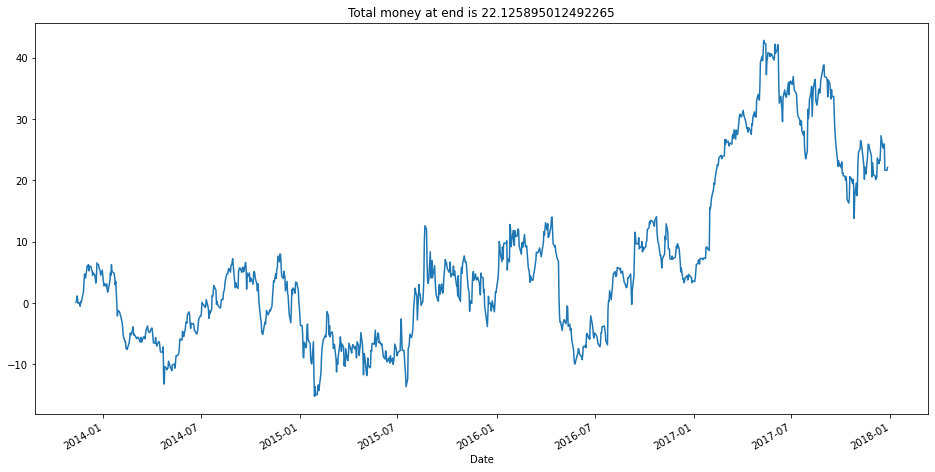

In [13]:
AAPL['wealth'].plot(figsize=(16,8))
plt.title('Total money at end is {}'.format(AAPL.loc[AAPL.index[-2], 'wealth']))